# Predicting Stock Prices with Recurrent Neural Networks in TensorFlow

Written by: Udbhav Prasad <br>
Linkedin: https://www.linkedin.com/in/udbhav-prasad-1506b7192/ <br>
HackerRank: https://www.hackerrank.com/uprasad1 <br>
Github: https://github.com/UdbhavPrasad072300 <br>
Computer Science Co-op - Ryerson University <br> <hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [2]:
import yfinance as yf

## Data Preprocessing

In [3]:
goog = yf.Ticker("GOOG")

In [4]:
goog.info

{'zip': '94043',
 'sector': 'Communication Services',
 'fullTimeEmployees': 114096,
 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It offers performance and brand advertising services. The company operates through Google and Other Bets segments. The Google segment offers products, such as Ads, Android, Chrome, Google Cloud, Google Maps, Google Play, Hardware, Search, and YouTube, as well as technical infrastructure. It also offers digital content, cloud services, hardware devices, and other miscellaneous products and services. The Other Bets segment includes businesses, including Access, Calico, CapitalG, GV, Verily, Waymo, and X, as well as Internet and television services. Alphabet Inc. was founded in 1998 and is headquartered in Mountain View, California.',
 'city': 'Mountain View',
 'phone': '650-253-0000',
 'state': 'CA',
 'country': 'United States',
 'c

In [5]:
hist = goog.history(period="5Y")

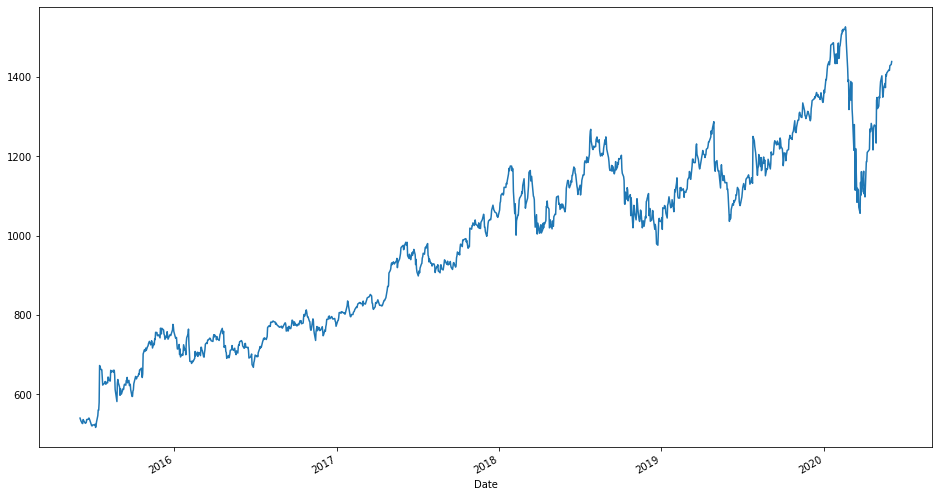

In [6]:
hist['Close'].plot(figsize=(16, 9))

In [7]:
hist.to_csv('GOOG.csv')

Importing Training Set

In [8]:
dataset_train = hist
training_set = dataset_train.iloc[:, 1:2].values

In [9]:
len(training_set)

1259

Feature Scaling (Normalizing)

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Creating a data structure with 60 timesteps and 1 output

In [11]:
X_train = []
y_train = []
for i in range(60, len(training_set)-200):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building Recurrent Neural Network

Initializing Sequential Network

In [13]:
regressor = Sequential()

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(Dense(units = 1))

Compiling Recurrent Neural Network

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Training Recurrent Neural Network

In [20]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 999 samples
Epoch 1/100
999/999 [==============================] - 6s 6ms/sample - loss: 0.0253
Epoch 2/100
999/999 [==============================] - 0s 376us/sample - loss: 0.0052
Epoch 3/100
999/999 [==============================] - 0s 378us/sample - loss: 0.0037
Epoch 4/100
999/999 [==============================] - 0s 377us/sample - loss: 0.0032
Epoch 5/100
999/999 [==============================] - 0s 377us/sample - loss: 0.0030
Epoch 6/100
999/999 [==============================] - 0s 382us/sample - loss: 0.0031
Epoch 7/100
999/999 [==============================] - 0s 375us/sample - loss: 0.0032
Epoch 8/100
999/999 [==============================] - 0s 374us/sample - loss: 0.0032
Epoch 9/100
999/999 [==============================] - 0s 379us/sample - loss: 0.0027
Epoch 10/100
999/999 [==============================] - 0s 381us/sample - loss: 0.0026
Epoch 11/100
999/999 [==============================] - 0s 380us/sample - loss: 0.0033
Epoch 12/100
999/999 [===========

999/999 [==============================] - 0s 378us/sample - loss: 8.7520e-04
Epoch 95/100
999/999 [==============================] - 0s 377us/sample - loss: 9.8369e-04s - loss: 0.0010 
Epoch 96/100
999/999 [==============================] - 0s 378us/sample - loss: 9.3232e-04
Epoch 97/100
999/999 [==============================] - 0s 379us/sample - loss: 8.7595e-04
Epoch 98/100
999/999 [==============================] - 0s 380us/sample - loss: 8.2732e-04
Epoch 99/100
999/999 [==============================] - 0s 374us/sample - loss: 7.6671e-04
Epoch 100/100
999/999 [==============================] - 0s 377us/sample - loss: 8.5513e-04


## Predictions and Visualizations

In [21]:
# Getting the stock price of 2020
dataset_test = pd.read_csv("GOOG.csv")
dataset_test = dataset_test.iloc[-200:]
len(dataset_test)

200

In [22]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [23]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
print(type(predicted_stock_price))
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

<class 'numpy.ndarray'>


## Plotting

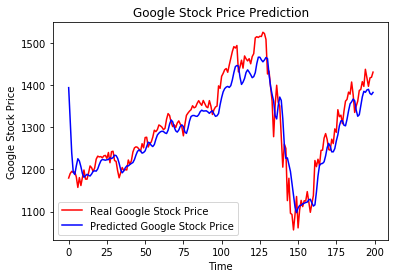

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()